# Customer churn

Customers began to leave "Beta Bank". Every month. A little, but noticeable. Bank marketers have calculated that it is cheaper to retain current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. We are presented with historical data on the behavior of customers and the termination of contracts with the bank.

It is necessary to build a model with an extremely large value of *F1*-measures. To pass the project successfully, we need to bring the metric to 0.59. Check the *F1* measure on the test sample yourself.

Additionally measure *AUC-ROC*, compare its value with *F1*-measure.

Data source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Data preparation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt

The data consists of:

Features:
- `RowNumber` — index of the row in the data
- `CustomerID` — unique identifier of the customer
- `Surname` — surname
- `CreditScore` — credit rating
- `Geography` — country of residence
- `Gender` — gender
- `Age` — age
- `Tenure` — how many years has a person been a customer of the bank
- `Balance` — account balance
- `NumOfProducts` — the number of bank products used by the customer
- `HasCrCard` — availability of a credit card
- `IsActiveMember` — client activity
- `EstimatedSalary` — estimated salary

Target:
- `Exited` — the fact of the client's departure

In [2]:
df = pd.read_csv('datasets/Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


There are gaps in the `Tenure` column, and there is also unnecessary data for the model training process.

First we will remove the uninformative columns:

In [5]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div class="alert alert-block alert-success">
<b>Успех:</b> Правильно, эти столбцы не пригодятся для обучения моделей 👍
</div>

The missing values are about 10% of the total dataset, then we can remove them so as not to disturb the training of the model

In [6]:
df = df.dropna().reset_index(drop=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9086,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9087,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9088,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9089,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


*An alternative way to handle missing values:* since there are a limited number of values in this attribute, we can make it a categorical attribute. The omissions can be considered as a independent category (fill in with the value -1). Then apply the OHE technique

In [7]:
df.duplicated().sum()

0

There are no obvious duplicates in the data

## Research

### In order to present the data for the model in a more readable form, we need to split the categorical features by the OHE method (while not forgetting about the dummy trap):¶

In [8]:
df = pd.get_dummies(df,drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9086,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9087,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9088,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9089,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


### Checking for class imbalance:

Percentage of exited clients, relative to the total number: 20.39 %


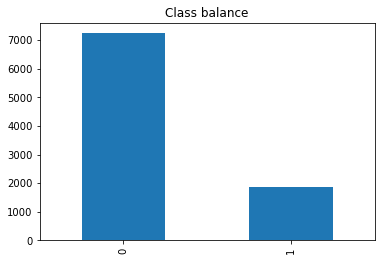

In [9]:
df['Exited'].value_counts().plot(kind='bar', title = 'Class balance')
print('Percentage of exited clients, relative to the total number:', round(df['Exited'].value_counts()[1] / (df['Exited'].value_counts()[0]+df['Exited'].value_counts()[1])*100, 2),'%')

As can be seen from the graph - there is an imbalance of classes

### The model without taking into account the imbalance of classes

#### We select the target attribute and divide the data into training and validation samples

In [10]:
target=df['Exited']
features=df.drop(['Exited'],axis=1)
features_train,features_valid,target_train,target_valid=train_test_split(features,target,test_size=0.4,random_state=1235)
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(5454, 11)
(5454,)
(3637, 11)
(3637,)


In [11]:
features_test,features_valid,target_test,target_valid=train_test_split(features_valid,target_valid,test_size=0.5,random_state=1235)
print(features_test.shape)
print(target_test.shape)
print(features_valid.shape)
print(target_valid.shape)

(1818, 11)
(1818,)
(1819, 11)
(1819,)


The data is split correctly

#### Scaling the data for better training of the model

In [12]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train_scaled = scaler.transform(features_train)
features_valid_scaled = scaler.transform(features_valid)
features_test_scaled = scaler.transform(features_test)

#### Logistic Regression

In [13]:
model = LogisticRegression()
model.fit(features_train_scaled,target_train)
predicted = model.predict(features_valid_scaled)
print(f'f1_score = {round(f1_score(target_valid,predicted),3)}')
print(f'auc_roc_score = {round(roc_auc_score(target_valid,predicted),3)}')

f1_score = 0.272
auc_roc_score = 0.572


#### Decision Tree

In [14]:
best_score = 0
best_deprth = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state =12345, max_depth = depth)
    model.fit(features_train_scaled,target_train)
    predicted = model.predict(features_valid_scaled)
    score = f1_score(target_valid,predicted)
    if score > best_score:
        best_score = score
        best_depth = depth
print(f'f1_score = {round(best_score,3)}')
print(f'best_depth = {best_depth}')

f1_score = 0.59
best_depth = 7


In [15]:
model = DecisionTreeClassifier(random_state=12345, max_depth = 7)
model.fit(features_train_scaled,target_train)
predicted = model.predict(features_valid_scaled)
score = roc_auc_score(target_valid,predicted)
print(f'roc_auc_score = {round(score,3)}')

roc_auc_score = 0.722


#### Random Forest

In [16]:
best_score = 0
best_deprth = 0
best_estimators = 0
for estimators in range(100, 1001, 100):
    for depth in range(1,10):
        model = RandomForestClassifier(random_state=12345, max_depth = depth, n_estimators = estimators)
        model.fit(features_train_scaled,target_train)
        predicted = model.predict(features_valid_scaled)
        score = f1_score(target_valid,predicted)
        if score > best_score:
            best_score = score
            best_depth = depth
            best_estimators = estimators
print(f'f1_score = {round(best_score,3)}')
print(f'best_depth = {best_depth}')
print(f'best_estimators = {best_estimators}')

f1_score = 0.588
best_depth = 9
best_estimators = 600


In [17]:
model = RandomForestClassifier(random_state=12345, max_depth = 9, n_estimators = 600)
model.fit(features_train_scaled,target_train)
predicted = model.predict(features_valid_scaled)
score = roc_auc_score(target_valid,predicted)
print(f'roc_auc_score = {round(best_score,3)}')

roc_auc_score = 0.588


### Conclusion

As can be seen from the **f1 and roc-auc** indicators, the Decision Tree model performed best on models without taking into account the balance

## Imbalance treatment

### Downsampling method

With a sufficient amount of data, we could use the downsampling technique, but upsampling is better for current data

### Upsampling method

In [18]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [19]:
features_train_scaled = pd.DataFrame(features_train_scaled, index = target_train.index)
                                     
features_train_upsampled, target_train_upsampled = upsample(features_train_scaled, target_train, 4)

`repeat` parameter is selected in such a way as to balance the classes

<AxesSubplot:>

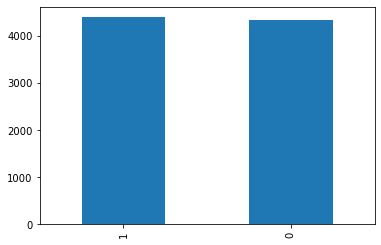

In [20]:
target_train_upsampled.value_counts().plot(kind='bar')

Now the number of exited and remaining customers is relatively the same

## Testing the model

### Logistic Regression

In [21]:
model = LogisticRegression()
model.fit(features_train_upsampled,target_train_upsampled)
predicted = model.predict(features_test_scaled)
print(f'f1_score = {round(f1_score(target_test,predicted),3)}')
print(f'auc_roc_score = {round(roc_auc_score(target_test,predicted),3)}')

f1_score = 0.507
auc_roc_score = 0.714


### Decision Tree

In [22]:
best_score = 0
best_deprth = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state =12345, max_depth = depth)
    model.fit(features_train_upsampled,target_train_upsampled)
    predicted = model.predict(features_test_scaled)
    score = f1_score(target_test,predicted)
    if score > best_score:
        best_score = score
        best_depth = depth
print(f'f1_score = {round(best_score,3)}')
print(f'best_depth = {best_depth}')

f1_score = 0.578
best_depth = 5


In [23]:
model = DecisionTreeClassifier(random_state =12345, max_depth = 5)
model.fit(features_train_upsampled,target_train_upsampled)
predicted = model.predict(features_test_scaled)
score = roc_auc_score(target_test,predicted)
print(f'roc_auc_score = {round(score,3)}')

roc_auc_score = 0.769


### Random Forest

In [24]:
best_score = 0
best_deprth = 0
best_estimators = 0
for estimators in range(100, 1001, 100):
    for depth in range(1,10):
        model = RandomForestClassifier(random_state =12345, max_depth = depth, n_estimators = estimators)
        model.fit(features_train_upsampled,target_train_upsampled)
        predicted = model.predict(features_test_scaled)
        score = f1_score(target_test,predicted)
        if score > best_score:
            best_score = score
            best_depth = depth
            best_estimators = estimators
print(f'f1_score = {round(best_score,3)}')
print(f'best_depth = {best_depth}')
print(f'best_estimators = {best_estimators}')

f1_score = 0.625
best_depth = 9
best_estimators = 200


In [25]:
model = RandomForestClassifier(random_state =12345, max_depth = 9, n_estimators = 200)
model.fit(features_train_upsampled,target_train_upsampled)
predicted = model.predict(features_test_scaled)
score = roc_auc_score(target_test,predicted)
print(f'roc_auc_score = {round(score,3)}')

roc_auc_score = 0.776


### Conclusion

As can be seen from the indicators, the best model is a **Random Forest**, while getting rid of the imbalance of classes, we have significantly increased the indicators for all types of models.

### Checking a Random Forest on a synthetic model

In [26]:
model = RandomForestClassifier(random_state =12345, max_depth = 9, n_estimators = 200)
model.fit(features_train_upsampled,target_train_upsampled)
predicted = pd.Series(1,index=target_valid.index)
f1_score = f1_score(target_valid,predicted)
roc_auc_score = roc_auc_score(target_valid,predicted)
print(f'f1_score = {round(f1_score,3)}')
print(f'roc_auc_score = {roc_auc_score}')

f1_score = 0.348
roc_auc_score = 0.5


#### Conclusion

On the constant model, the result is much lower, which indicates the adequacy of our model

### ROC Curve

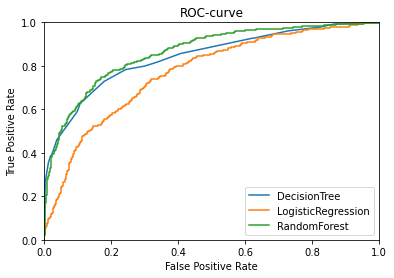

In [27]:
model_lr = LogisticRegression()
model_lr.fit(features_train_upsampled,target_train_upsampled)
probabilities_valid = model_lr.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr_lr, tpr_lr, thresholds = roc_curve(target_valid, probabilities_one_valid)

model_tree = DecisionTreeClassifier(random_state =12345, max_depth = 5)
model_tree.fit(features_train_upsampled,target_train_upsampled)
probabilities_valid = model_tree.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr_tree, tpr_tree, thresholds = roc_curve(target_valid, probabilities_one_valid)

model_rf = RandomForestClassifier(random_state =12345, max_depth = 9, n_estimators = 200)
model_rf.fit(features_train_upsampled,target_train_upsampled)
probabilities_valid = model_rf.predict_proba(features_test_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr_rf, tpr_rf, thresholds = roc_curve(target_test, probabilities_one_valid)

plt.figure()

plt.plot(fpr_tree, tpr_tree)
plt.plot(fpr_lr, tpr_lr)
plt.plot(fpr_rf, tpr_rf)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend(['DecisionTree','LogisticRegression','RandomForest']) 
plt.show() 

#### Conclusion

By the type of the ROC curve, it can also be concluded that the optimal model is a Random Forest (the largest deviation)

## General Conclusion

- The original data were analyzed and processed (omissions and uninformative columns were removed, OHE conversion was performed)
- Checked for class imbalance
- The model was trained without taking into account the imbalance:
  * The best result:
  * Decision Tree (f1_score = 0.59, best_depth = 7)
- Accounting of the imbalance has been carried out
- The model was trained taking into account the imbalance:
  * The best result:
  * Random forest (f1_score = 0.63, best_depth = 9, best_estimators = 200)
- The conclusions are also confirmed by comparing the ROC-curves of the logarithmic regression model, the decision tree model and the random forest model 
  * The best result:
  * Random forest has the largest deviation